<a href="https://colab.research.google.com/github/dineshnaiduavula/NLP/blob/main/coursework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Error reading file: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.



,Tweet,cleaned_tweet
0,"@tedcruz And, #HandOverTheServer she wiped cle...",tedcruz handovertheserver wiped clean k delete...
1,Hillary is our best choice if we truly want to...,hillary best choice truly want continue progre...
2,@TheView I think our country is ready for a fe...,theview think country ready female pres cant e...
3,I just gave an unhealthy amount of my hard-ear...,gave unhealthy amount hardearned money away bi...
4,@PortiaABoulger Thank you for adding me to you...,portiaaboulger thank adding list


Labels: ['AGAINST' 'FAVOR' 'NONE']
Logistic Regression trained successfully.
Naïve Bayes trained successfully.
Random Forest trained successfully.
Results for Logistic Regression:

              precision    recall  f1-score   support

     AGAINST       0.75      0.99      0.85       110
       FAVOR       1.00      0.44      0.61        32
        NONE       0.97      0.67      0.80        58

    accuracy                           0.81       200
   macro avg       0.91      0.70      0.75       200
weighted avg       0.85      0.81      0.80       200



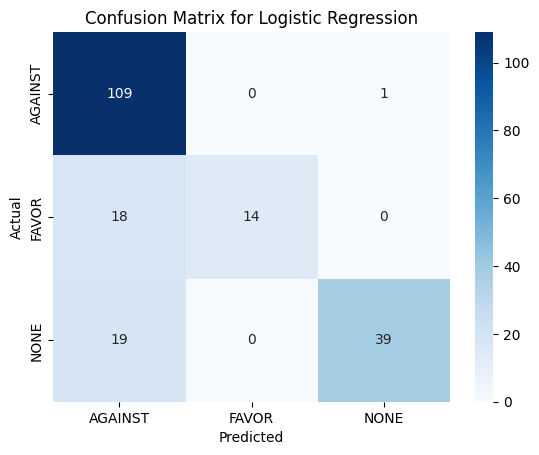

Results for Naïve Bayes:

              precision    recall  f1-score   support

     AGAINST       0.72      0.97      0.83       110
       FAVOR       1.00      0.47      0.64        32
        NONE       0.92      0.59      0.72        58

    accuracy                           0.78       200
   macro avg       0.88      0.68      0.73       200
weighted avg       0.82      0.78      0.77       200



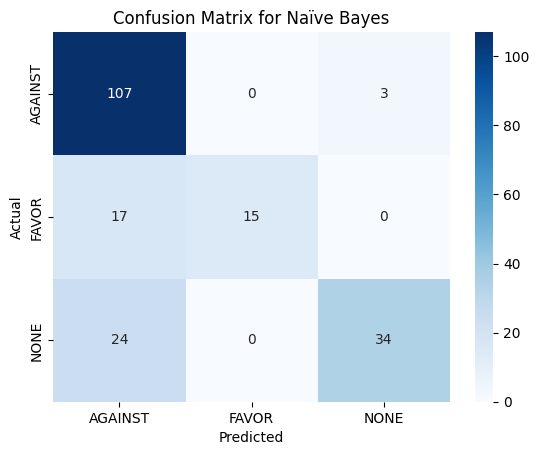

Results for Random Forest:

              precision    recall  f1-score   support

     AGAINST       0.84      0.99      0.91       110
       FAVOR       1.00      0.81      0.90        32
        NONE       0.98      0.74      0.84        58

    accuracy                           0.89       200
   macro avg       0.94      0.85      0.88       200
weighted avg       0.90      0.89      0.89       200



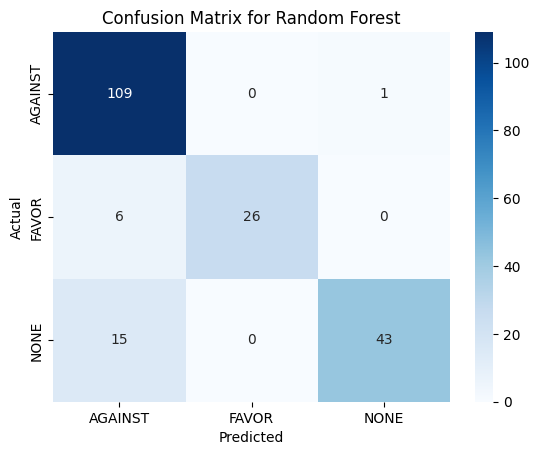

,Model,Accuracy,Macro F1-Score
0,Logistic Regression,0.81,0.752059
1,Naïve Bayes,0.78,0.727848
2,Random Forest,0.89,0.882674


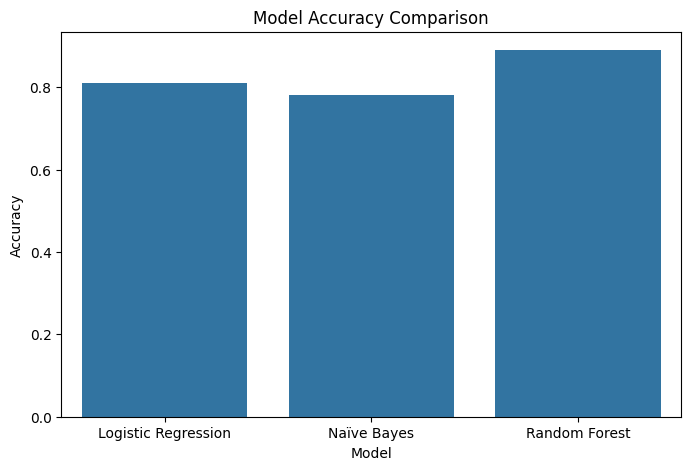

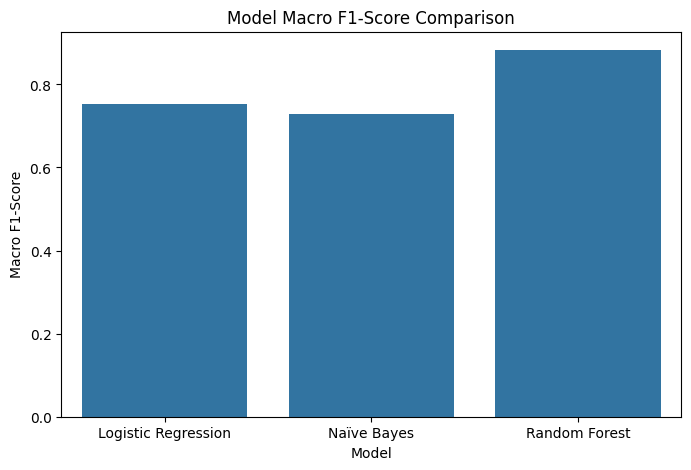

Best model (Random Forest) saved successfully.


,Predicted Stance
0,AGAINST
1,AGAINST
2,AGAINST
3,AGAINST
4,AGAINST
...,...
995,AGAINST
996,AGAINST
997,AGAINST
998,AGAINST


In [4]:
import pandas as pd
import re
import nltk
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import joblib
from IPython.display import display

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Download necessary NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
# Download the 'punkt_tab' resource
nltk.download('punkt_tab') # This line was added to download the missing resource

# Load datasets from GitHub
train_url = "https://raw.githubusercontent.com/dineshnaiduavula/NLP/refs/heads/main/train.csv"
test_url = "https://raw.githubusercontent.com/dineshnaiduavula/NLP/refs/heads/main/test.csv"

try:
    train_dset = pd.read_csv(train_url, encoding="ISO-8859-1")
    test_dset = pd.read_csv(test_url)
    display(train_dset.head())
    display(test_dset.head())
except Exception as e:
    print("Error reading file:", e)

# Ensure necessary columns exist
if "Tweet" not in train_dset.columns or "Stance" not in train_dset.columns:
    raise ValueError("Required columns not found in train dataset")
if "Tweet" not in test_dset.columns:
    raise ValueError("Required column not found in test dataset")

# Initialize preprocessing tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    """Function to clean and preprocess text"""
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply text cleaning
train_dset["cleaned_tweet"] = train_dset["Tweet"].astype(str).apply(clean_text)
test_dset["cleaned_tweet"] = test_dset["Tweet"].astype(str).apply(clean_text)

# Display cleaned tweets
display(train_dset[["Tweet", "cleaned_tweet"]].head())

# Convert text to numerical features
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_dset["cleaned_tweet"])
X_test = vectorizer.transform(test_dset["cleaned_tweet"])

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_dset["Stance"])
print("Labels:", label_encoder.classes_)

# Split training data
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naïve Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Train models
for name, model in models.items():
    model.fit(X_train_split, y_train_split)
    print(f"{name} trained successfully.")

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_val_split)
    print(f"Results for {name}:\n")
    print(classification_report(y_val_split, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_val_split, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

# Store results
results = {
    "Model": [],
    "Accuracy": [],
    "Macro F1-Score": []
}

for name, model in models.items():
    y_pred = model.predict(X_val_split)
    acc = accuracy_score(y_val_split, y_pred)
    f1 = f1_score(y_val_split, y_pred, average='macro')
    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["Macro F1-Score"].append(f1)

# Convert to DataFrame and display
df_results = pd.DataFrame(results)
display(df_results)

# Plot results
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=df_results)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Macro F1-Score", data=df_results)
plt.title("Model Macro F1-Score Comparison")
plt.ylabel("Macro F1-Score")
plt.show()

# Save the best model
best_model_name = df_results.sort_values(by="Accuracy", ascending=False)["Model"].iloc[0]
best_model = models[best_model_name]
joblib.dump(best_model, "best_stance_model.pkl")
print(f"Best model ({best_model_name}) saved successfully.")

# Make predictions on test set
y_test_pred = best_model.predict(X_test)

# Convert predictions back to labels
y_test_labels = label_encoder.inverse_transform(y_test_pred)
display(pd.DataFrame({"Predicted Stance": y_test_labels}))